Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2613 - Inteligencia Artificial <br>
<br>

---
<center>
    <h1> Ayudantía 14 : Procesamiento de Lenguaje Natural </h1>
    <h3>
        Ayudantes: Kaina Galdames y Martín Castillo<br>
        Primer Semestre 2024<br>    
        1 de julio de 2024
    </h3>
    <img src="" scale=0.5>
    <br>
</center>

<br>

---

## Tokenización

In [ ]:
text = "Ayudantía 14: Procesamiento de Lenguaje Natural"

BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
tokens_bert = tokenizer_bert.tokenize(text)

In [ ]:
print("Tokenización BERT:", tokens_bert)

Tokenización BERT: ['a', '##yu', '##dant', '##ia', '14', ':', 'pro', '##ces', '##ami', '##ent', '##o', 'de', 'len', '##gua', '##je', 'natural']


NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens_nltk = word_tokenize(text)

In [ ]:
print("Tokenización NLTK:", tokens_nltk)

Tokenización NLTK: ['Ayudantía', '14', ':', 'Procesamiento', 'de', 'Lenguaje', 'Natural']


spaCy

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 66.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("es_core_news_sm")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
doc = nlp(text)
tokens_spacy = [token.text for token in doc]

In [ ]:
print("Tokenización spaCy:", tokens_spacy)

Tokenización spaCy: ['Ayudantía', '14', ':', 'Procesamiento', 'de', 'Lenguaje', 'Natural']


Gensim

In [ ]:
from gensim.utils import simple_preprocess

In [ ]:
tokens_gen = simple_preprocess(text)

In [ ]:
print("Tokenización Gensim:", tokens_gen)

Tokenización Gensim: ['ayudantía', 'procesamiento', 'de', 'lenguaje', 'natural']


## Encoding completo

BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
inputs = tokenizer_bert(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')

with torch.no_grad():
    outputs = model_bert(**inputs)

cls_embedding = outputs.last_hidden_state[:, 0, :]

In [ ]:
print("Encoding BERT (primeros 5 valores del vector del primer token):", cls_embedding[0][:5])

Encoding BERT (primeros 5 valores del vector del primer token): tensor([-0.4907,  0.1903,  0.0123, -0.2054, -0.0283])


NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens_nltk = word_tokenize(text)
fdist = FreqDist(tokens_nltk)
vocab = fdist.keys()

In [ ]:
encoding_nltk = [list(vocab).index(token) for token in tokens_nltk]

In [ ]:
print("NLTK encoding:", encoding_nltk)

NLTK encoding: [0, 1, 2, 3, 4, 5, 6]


spaCy

In [ ]:
import spacy

nlp = spacy.load("es_core_news_sm")

In [ ]:
doc = nlp(text)
encoding_spacy = [token.vector for token in doc]

In [ ]:
print("spaCy encoding (primeros 5 valores del vector del primer token):", encoding_spacy[0][:5])

spaCy encoding (primeros 5 valores del vector del primer token): [-0.50763303  0.27131206  0.43269086  0.17814642 -3.3798935 ]


## Bert para análisis de sentimiento en reseñas

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model_bert_sa = BertForSequenceClassification.from_pretrained(model_name)
tokenizer_bert_sa = BertTokenizer.from_pretrained(model_name)

sentiment_analysis = pipeline("sentiment-analysis", model=model_bert_sa, tokenizer=tokenizer_bert_sa)

In [ ]:
sentences = [
    "Es lo peor que he usado",
    "De lo mejor que he visto",
    "No está mal",
    "No es tan parecido a la foto",
    "Es casi perfecto, pero le falta algo"
]

In [ ]:
results = sentiment_analysis(sentences)

In [ ]:
for sentence, result in zip(sentences, results):
    print(f"Oración: {sentence}")
    print(f"Sentimiento: {result['label']} (Score: {result['score']:.2f})")
    print()

Oración: Es lo peor que he usado
Sentimiento: 1 star (Score: 0.88)

Oración: De lo mejor que he visto
Sentimiento: 5 stars (Score: 0.86)

Oración: No está mal
Sentimiento: 3 stars (Score: 0.71)

Oración: No es tan parecido a la foto
Sentimiento: 2 stars (Score: 0.45)

Oración: Es casi perfecto, pero le falta algo
Sentimiento: 4 stars (Score: 0.53)



## Clasificación de emails con phishing

In [ ]:
#El dataset se peude encontrar aquí:
# https://www.kaggle.com/datasets/subhajournal/phishingemails

#Una forma de cargar el dataset es montando google drive y usandolo desde ahí
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

<Axes: xlabel='Email Type', ylabel='count'>

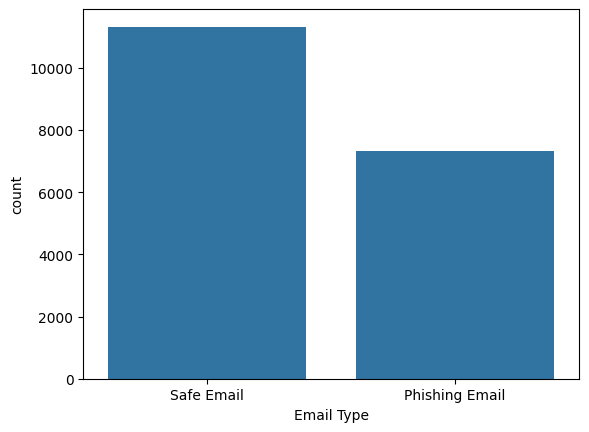

In [ ]:
#Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/Phishing_Email.csv")
sns.countplot(x='Email Type',data=df)

In [ ]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
#Limpiamos el dataset porque este puede contener información no relevante para la
#clasificación como puntuaciones, direcciones de email, numeros de teléfono, urls etc
#Importar la librería
from neattext.functions import clean_text
#Limpiar cada fila
df['Clean_Text'] = df['Email Text'].astype(str).apply(clean_text, urls=True, stopwords=True, puncts=True, emails = True)
X = df['Clean_Text']
y = df['Email Type']

In [ ]:
#Tokenizar con BERT y extraer features del texto

tfidf_vectorizer = TfidfVectorizer(max_features=1000, analyzer ='word', tokenizer = tokenizer_bert.tokenize)
X_tfidf = tfidf_vectorizer.fit_transform(X)
features = tfidf_vectorizer.get_feature_names_out()
X_arr = X_tfidf.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Convertir las etiquetas enteras a one-hot
y_one_hot = to_categorical(y_encoded)

In [ ]:
features

array(['#', '##0', '##00', '##1', '##10', '##11', '##12', '##19', '##2',
       '##20', '##21', '##3', '##30', '##4', '##5', '##6', '##7', '##8',
       '##9', '##a', '##aa', '##able', '##ad', '##ag', '##al', '##am',
       '##an', '##ar', '##as', '##at', '##ation', '##b', '##bl', '##ble',
       '##bs', '##bu', '##c', '##ca', '##cal', '##ce', '##ch', '##ci',
       '##ck', '##cl', '##co', '##com', '##con', '##cr', '##ct', '##ctic',
       '##d', '##da', '##de', '##do', '##e', '##ec', '##ed', '##ef',
       '##el', '##em', '##en', '##ent', '##er', '##ers', '##es', '##et',
       '##ex', '##f', '##fa', '##ff', '##fi', '##fl', '##fo', '##for',
       '##fr', '##g', '##ga', '##ge', '##gen', '##gi', '##go', '##gs',
       '##gy', '##h', '##ha', '##ht', '##i', '##ia', '##ial', '##ibe',
       '##ic', '##id', '##ie', '##ies', '##if', '##ii', '##il', '##in',
       '##ing', '##inski', '##io', '##ion', '##is', '##ist', '##it',
       '##ity', '##ive', '##iver', '##ization', '##j', '##ja', '##j

In [ ]:
#Hacer división de dataset
X_train, X_test, y_train, y_test = train_test_split(X_arr,
                                  y_one_hot, test_size=0.3, stratify = y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                  y_test, test_size=0.2, random_state=0)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir el modelo
model = Sequential()

# Capa de entrada (input_shape debe coincidir con el número de características en X)
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))

# Capa oculta
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida (el número de neuronas debe coincidir con el número de clases en y)
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
408/408 [==============================] - 6s 4ms/step - loss: 0.2478 - accuracy: 0.8872 - val_loss: 0.1134 - val_accuracy: 0.9551
Epoch 2/50
408/408 [==============================] - 2s 4ms/step - loss: 0.1154 - accuracy: 0.9558 - val_loss: 0.1056 - val_accuracy: 0.9569
Epoch 3/50
408/408 [==============================] - 2s 4ms/step - loss: 0.0877 - accuracy: 0.9650 - val_loss: 0.1069 - val_accuracy: 0.9591
Epoch 4/50
408/408 [==============================] - 2s 4ms/step - loss: 0.0691 - accuracy: 0.9726 - val_loss: 0.1178 - val_accuracy: 0.9549
Epoch 5/50
408/408 [==============================] - 2s 4ms/step - loss: 0.0559 - accuracy: 0.9785 - val_loss: 0.1196 - val_accuracy: 0.9576
Epoch 6/50
408/408 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9805 - val_loss: 0.1314 - val_accuracy: 0.9578
Epoch 7/50
408/408 [==============================] - 2s 6ms/step - loss: 0.0403 - accuracy: 0.9822 - val_loss: 0.1404 - val_accuracy: 0.9567
Epoch 

In [ ]:
#Sacamos la matriz de confusión
from sklearn.metrics import confusion_matrix
#Predecir
y_prediction = model.predict(X_test)
y_prediction = np.argmax(y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)

result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

35/35 [==============================] - 0s 2ms/step
[[0.92703863 0.01990812]
 [0.07296137 0.98009188]]


In [ ]:
#Hacer división de dataset para recuperar los textos originales
_, X_test_original, _, y_test_orignal = train_test_split(df['Email Text'],
                                  y, test_size=0.3, stratify = y, random_state=42)
_, X_test_original, _, y_test_orignal = train_test_split(X_test_original,
                                  y_test_orignal, test_size=0.2, random_state=0)

#Probamos el modelo con algunos datos de test
y_test_orignal = y_test_orignal.to_numpy()
X_test_original = X_test_original.to_numpy()

In [ ]:
print(X_test_original[0]) #Safe email
print('------------------')
print(X_test_original[21]) #Phishing email

re : amendment to im ii ppa todd and louise , with respect to no . 1 below , i will check with mike curry to get his view on " contract intent " . with respect to no . 2 and no . 3 , the answer is absolutely " no " as they are material changes to the contract that have significant value issues . since i personally requested these changes to the original contract ( in the negotiation process ) , i know what the contract intent was and continues to be . if aep is still the equity buyer , they have complete control over the " grid curtailment " and associated termination risk in item no . 2 since they are the transmission owning utility in the region . the total epmi ppa ( as of 9 / 17 cob ) value is currently $ 18 . 5 million . my estimate for ppa value erosion for amendments no . 2 and no . 3 is $ 8 - 10 million . obviously , the $ erosion value is somewhat subjective , however , the transmission risk / grid curtailment risk on this project is significant and the termination event for g

In [ ]:
print(y_prediction[0])
print('------------------')
print(y_prediction[21])

1
------------------
0
